In [1]:
import numpy as np
import pandas as pd

In [2]:
'''Loading Olympic edition DataFrame'''

Editions = pd.read_csv("D:/Programming in Data Science/NumPy/Assignment/Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv", sep = '\t')

edition = Editions[['Edition','Grand Total','City','Country']]
edition

,Edition,Grand Total,City,Country
0,1896,151,Athens,Greece
1,1900,512,Paris,France
2,1904,470,St. Louis,United States
3,1908,804,London,United Kingdom
4,1912,885,Stockholm,Sweden
5,1920,1298,Antwerp,Belgium
6,1924,884,Paris,France
7,1928,710,Amsterdam,Netherlands
8,1932,615,Los Angeles,United States
9,1936,875,Berlin,Germany


In [3]:
'''Loading IOC codes DataFrame'''

ioc_codes = pd.read_csv("D:/Programming in Data Science/NumPy/Assignment/Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv")
print(ioc_codes.head())
print("\n")
print(ioc_codes.tail())

           Country  NOC ISO code
0      Afghanistan  AFG       AF
1          Albania  ALB       AL
2          Algeria  ALG       DZ
3  American Samoa*  ASA       AS
4          Andorra  AND       AD


             Country  NOC ISO code
196          Vietnam  VIE       VN
197  Virgin Islands*  ISV       VI
198            Yemen  YEM       YE
199           Zambia  ZAM       ZM
200         Zimbabwe  ZIM       ZW


In [4]:
Summer_year = pd.read_csv("D:/Programming in Data Science/NumPy/Assignment/Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.tsv", sep = '\t')
Summer =Summer_year.drop(Summer_year.index[[0,1,2,3]])
Summer = Summer.rename(columns = {'List of medallists at the Games of the Olympiad per edition, sport, discipline, gender and event':'City',
                                            'Unnamed: 1':'Edition','Unnamed: 2':'Sport','Unnamed: 3':'Discipline','Unnamed: 4':'Athlete',
                                            'Unnamed: 5':'NOC','Unnamed: 6':'Gender','Unnamed: 7':'Event','Unnamed: 8':'Event_gender',
                                            'Unnamed: 9':'Medal'}).reset_index()
summer = Summer[['City','Edition','Sport','Discipline','Athlete','NOC','Gender','Event','Event_gender','Medal']]
medals_dict = pd.DataFrame()
summer.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [5]:
'''Building medals DataFrame'''

medals = pd.DataFrame()
medals_dict = {}
for i in range(1896,2009,4):
    medals_ls= summer[summer.Edition == str(i)]
    medals_ls = medals_ls[['Edition','Athlete','NOC','Medal']]
    medals_dict[i] = medals_ls
    medals = medals.append(medals_dict[i],ignore_index = True)
    
print(medals.head())
print("\n")
print(medals.tail())

  Edition             Athlete  NOC   Medal
0    1896       HAJOS, Alfred  HUN    Gold
1    1896    HERSCHMANN, Otto  AUT  Silver
2    1896   DRIVAS, Dimitrios  GRE  Bronze
3    1896  MALOKINIS, Ioannis  GRE    Gold
4    1896  CHASAPIS, Spiridon  GRE  Silver


      Edition               Athlete  NOC   Medal
29211    2008        ENGLICH, Mirko  GER  Silver
29212    2008  MIZGAITIS, Mindaugas  LTU  Bronze
29213    2008       PATRIKEEV, Yuri  ARM  Bronze
29214    2008         LOPEZ, Mijain  CUB    Gold
29215    2008        BAROEV, Khasan  RUS  Silver


In [6]:
'''Counting medals by country/edition in a pivot table'''

medals = pd.read_csv("D:/Programming in Data Science/NumPy/Assignment/Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.tsv",sep='\t',header=0,skiprows=4)
medals = medals[['Edition','Athlete','NOC','Medal']]
medals_count = medals.pivot_table(index='Edition',columns='NOC',values='Athlete',aggfunc="count")
medals_count.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,...,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,394.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,10.0,NaN,NaN,NaN,14.0,NaN,NaN,...,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
'''Computing fraction of medals per Olympic edition'''

totals = Editions.set_index('Edition')
totals = totals['Grand Total']
fractions = medals_count.div(totals,axis='rows')
fractions.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,0.013245,0.033113,NaN,NaN,...,NaN,NaN,0.132450,NaN,NaN,NaN,NaN,NaN,NaN,0.039735
1900,NaN,NaN,NaN,NaN,NaN,NaN,0.009766,0.011719,NaN,NaN,...,NaN,NaN,0.107422,NaN,NaN,NaN,NaN,NaN,NaN,0.066406
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002128,NaN,NaN,...,NaN,NaN,0.838298,NaN,NaN,NaN,NaN,NaN,NaN,0.017021
1908,NaN,NaN,NaN,0.023632,NaN,NaN,NaN,0.001244,NaN,NaN,...,NaN,NaN,0.078358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,0.011299,NaN,NaN,NaN,0.015819,NaN,NaN,...,NaN,NaN,0.114124,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
'''Computing percentage change in fraction of medals won'''

mean_fractions = fractions.expanding().mean()
fractions_change = mean_fractions.pct_change()*100
fractions_change = fractions_change.reset_index()
print(fractions_change.head())
print("\n")
print(fractions_change.tail())

NOC  Edition  AFG  AHO  ALG        ANZ  ARG  ARM        AUS        AUT  AZE  \
0       1896  NaN  NaN  NaN        NaN  NaN  NaN        NaN        NaN  NaN   
1       1900  NaN  NaN  NaN        NaN  NaN  NaN -13.134766 -32.304688  NaN   
2       1904  NaN  NaN  NaN        NaN  NaN  NaN   0.000000 -30.169386  NaN   
3       1908  NaN  NaN  NaN        NaN  NaN  NaN   0.000000 -23.013510  NaN   
4       1912  NaN  NaN  NaN -26.092774  NaN  NaN   0.000000   6.254438  NaN   

NOC    ...      URS  URU         USA  UZB  VEN  VIE  YUG  ZAM  ZIM        ZZX  
0      ...      NaN  NaN         NaN  NaN  NaN  NaN  NaN  NaN  NaN        NaN  
1      ...      NaN  NaN   -9.448242  NaN  NaN  NaN  NaN  NaN  NaN  33.561198  
2      ...      NaN  NaN  199.651245  NaN  NaN  NaN  NaN  NaN  NaN -22.642384  
3      ...      NaN  NaN  -19.549222  NaN  NaN  NaN  NaN  NaN  NaN   0.000000  
4      ...      NaN  NaN  -12.105733  NaN  NaN  NaN  NaN  NaN  NaN   0.000000  

[5 rows x 139 columns]


NOC  Edition  AFG  

In [9]:
'''Building hosts DataFrame'''

hosts = pd.merge(edition,ioc_codes,on='Country',how='left')
hosts = hosts[['Edition','NOC']]
hosts = hosts.set_index('Edition')
hosts.loc[1972] = 'GER'
hosts.loc[1980] = 'RUS'
hosts.loc[1988] = 'KOR'
hosts = hosts.reset_index()
hosts

,Edition,NOC
0,1896,GRE
1,1900,FRA
2,1904,USA
3,1908,GBR
4,1912,SWE
5,1920,BEL
6,1924,FRA
7,1928,NED
8,1932,USA
9,1936,GER


In [10]:
'''Reshaping for analysis'''

reshaped = pd.melt(fractions_change,id_vars='Edition',value_name='Change')
reshaped.head()
chn = reshaped[reshaped['NOC'] == 'CHN']
chn.tail()

,Edition,NOC,Change
567,1992,CHN,4.240630
568,1996,CHN,7.860247
569,2000,CHN,-3.851278
570,2004,CHN,0.128863
571,2008,CHN,13.251332


In [11]:
'''Merging to compute influence'''

merged = pd.merge(reshaped,hosts,how='inner')
merged.head()
influence = merged.set_index('Edition')
influence = influence.sort_index()
influence.head()

,NOC,Change
Edition,,
1896,GRE,NaN
1900,FRA,198.002486
1904,USA,199.651245
1908,GBR,134.489218
1912,SWE,71.896226


[Text(0, 0, 'Athens'),
 Text(0, 0, 'Paris'),
 Text(0, 0, 'St. Louis'),
 Text(0, 0, 'London'),
 Text(0, 0, 'Stockholm'),
 Text(0, 0, 'Antwerp'),
 Text(0, 0, 'Paris'),
 Text(0, 0, 'Amsterdam'),
 Text(0, 0, 'Los Angeles'),
 Text(0, 0, 'Berlin'),
 Text(0, 0, 'London'),
 Text(0, 0, 'Helsinki'),
 Text(0, 0, 'Melbourne'),
 Text(0, 0, 'Rome'),
 Text(0, 0, 'Tokyo'),
 Text(0, 0, 'Mexico City'),
 Text(0, 0, 'Munich'),
 Text(0, 0, 'Montreal'),
 Text(0, 0, 'Moscow'),
 Text(0, 0, 'Los Angeles'),
 Text(0, 0, 'Seoul'),
 Text(0, 0, 'Barcelona'),
 Text(0, 0, 'Atlanta'),
 Text(0, 0, 'Sydney'),
 Text(0, 0, 'Athens'),
 Text(0, 0, 'Beijing')]

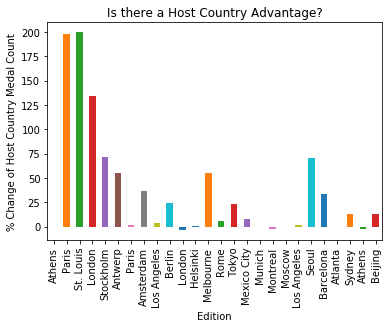

In [13]:
'''Plotting influence of host country'''

change = influence['Change']
ax = change.plot(kind='bar')
ax.set_ylabel("% Change of Host Country Medal Count") 
ax.set_title("Is there a Host Country Advantage?")
ax.set_xticklabels(edition['City'])